../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv: 7 failed experiments using turbo.gpu.release have been removed (the faulty experiments have been stored in failed_turbo.gpu.release-v1.2.8-mzn2024.csv).
Number of instances: 89
average_preprocessing_time=24.22
median_preprocessing_time=0.91
stddev_preprocessing_time=96.91


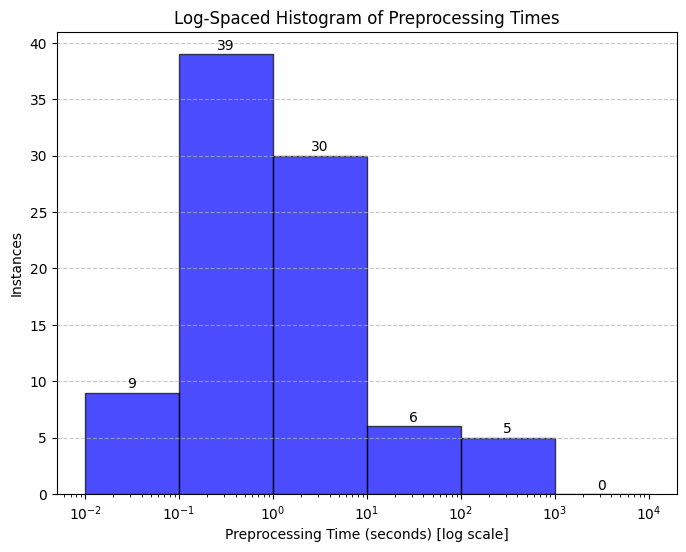

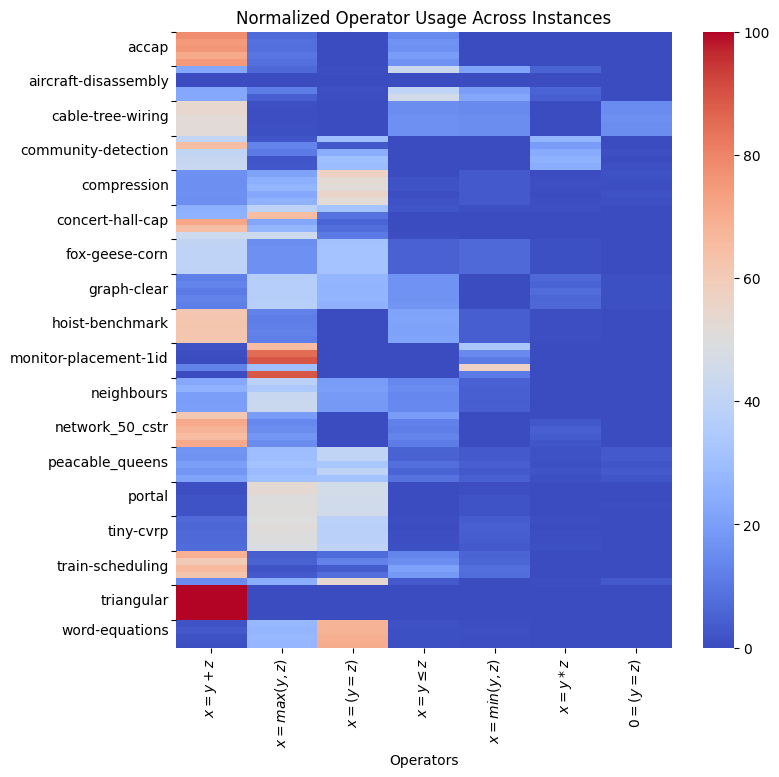

average_vars_increase=9.42
average_cons_increase=24.94
max_vars_increase=111.62
max_cons_increase=486.87
median_vars_increase=1.86
median_cons_increase=2.95
stddev_vars_increase=18.63
stddev_cons_increase=67.91
leq_10x_increase=63


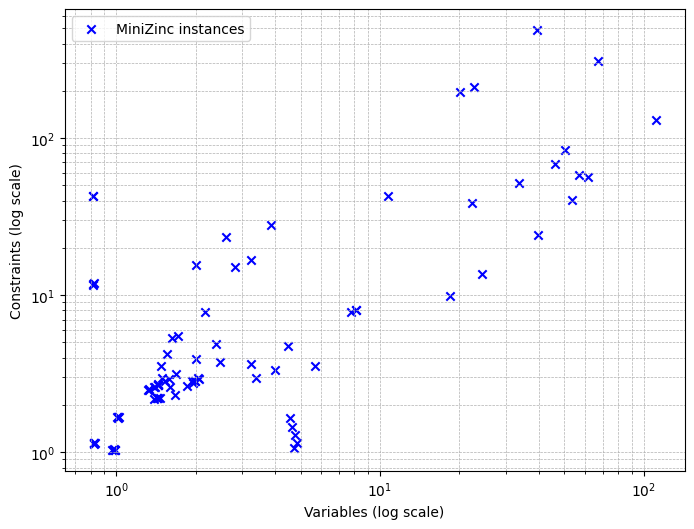

average_vars_increase=53.61
average_cons_increase=76.68
max_vars_increase=1133.22
max_cons_increase=1837.19
median_vars_increase=7.97
median_cons_increase=6.21
stddev_vars_increase=151.61
stddev_cons_increase=265.88
leq_10x_increase=46


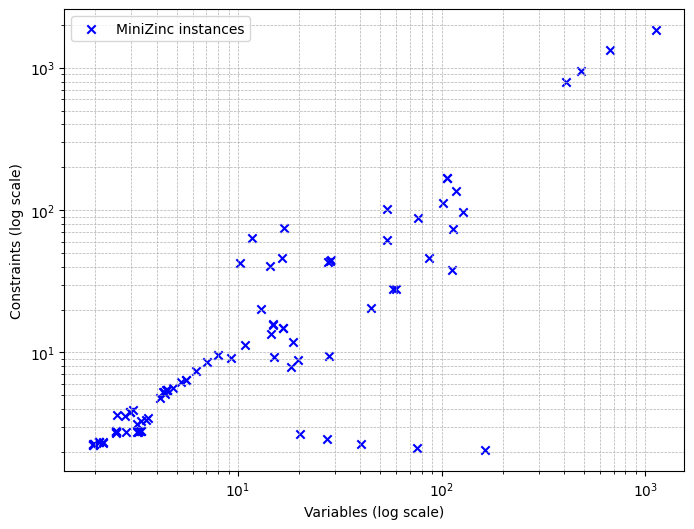

average_vars_increase=22.06
average_cons_increase=36.39
max_vars_increase=344.62
max_cons_increase=746.09
median_vars_increase=4.76
median_cons_increase=4.33
stddev_vars_increase=50.48
stddev_cons_increase=115.18
leq_10x_increase=53


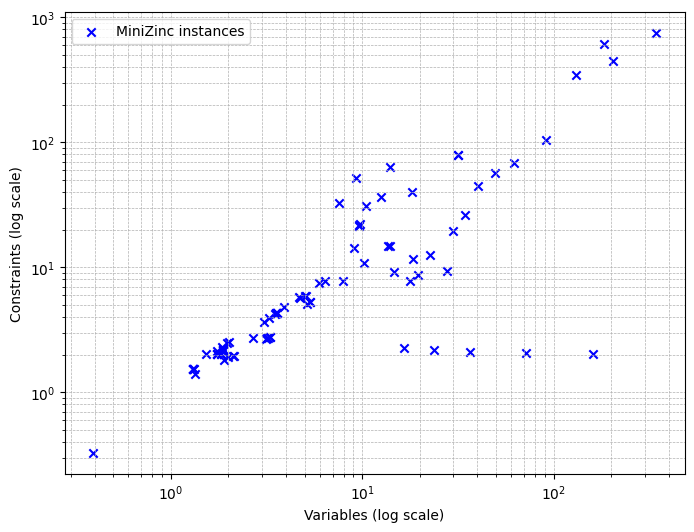

In [6]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/aion/turbo.cpu.release-v1.2.7-mzn2024-analysis.csv",
  "../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv"
])
df = df[df['uid'] == "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0"]

mzn_challenge = pd.read_csv("../benchmarking/mzn2024_noset.csv")
mzn_challenge['model_data_file'] = mzn_challenge['model'] + ' - ' + mzn_challenge['data_file']
# print(mzn_challenge)
mzn_data = set(mzn_challenge['model_data_file'])
df = df[df['model_data_file'].isin(mzn_data)]

# Instances that might have been solved during flattening.
df = df[~(df['nodes'].isna())]

# Print the number of rows
print(f"Number of instances: {df.shape[0]}")

analysis.preprocessing_time_distribution(df)
# analysis.analyse_tnf_per_problem(df, False, 'parsed_variables', 'parsed_constraints', 'variables_after_simplification', 'constraints_after_simplification')
analysis.heatmap_operators(df)

choco = analysis.read_experiments([
  "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv"
])
choco = choco[choco['model_data_file'].isin(mzn_data)]
choco = choco.drop_duplicates(subset='model_data_file', keep='first')
choco.rename(columns={'variables': 'choco_vars', 'constraints': 'choco_cons'}, inplace=True)
df = df.merge(choco[['model_data_file', 'choco_vars', 'choco_cons']], on='model_data_file', how='left')

analysis.boxplot_tcn_increase(df, 'choco_vars', 'choco_cons')
analysis.boxplot_preprocessing_components(df, ['eliminated_entailed_constraints', 'eliminated_equality_constraints', 'eliminated_constraints_by_icse'])

analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'parsed_variables', 'parsed_constraints')
analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'tnf_variables', 'tnf_constraints')
analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons','variables_after_simplification', 'constraints_after_simplification')
